In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [30]:
# Load dataset
df=pd.read_csv("tips.csv")
data = pd.read_csv('tips.csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [56]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

In [5]:
# 'Level' is the feature and 'Salary' is the target
X = data.drop('tip', axis=1).values  # Features
y = data['tip'].values   # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Linear Regression**

In [6]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.4441368826121932


## **Ridge Regression**

In [7]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))


Ridge Regression R2: 0.4457879533829946


## **Lasso Regression**

In [12]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))



Lasso Regression R2: 0.4633126386311087


## **Decision Tree Regression**

In [15]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))



Decision Tree R2: -0.06402275877244601


## **Ensemble Method (Random Forest Regression)**

In [16]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


Random Forest R2: 0.2312300487221487


## **Support Vector Regression (SVR)**

In [18]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))



SVR R2: 0.44183596997406027


## **K-Nearest Neighbors (KNN) Regression**

In [19]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.3294034029001649


<Axes: xlabel='total_bill', ylabel='tip'>

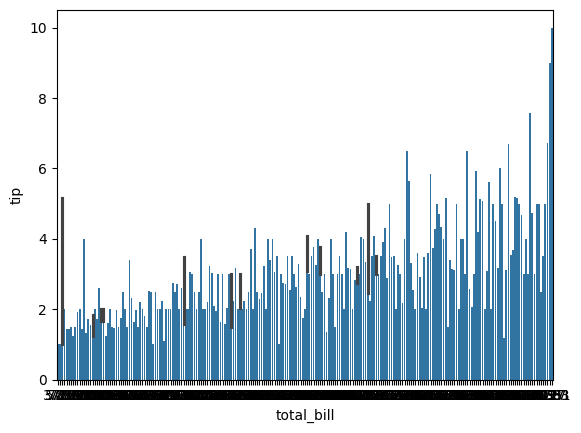

In [31]:
sns.barplot(x=df["total_bill"], y=df["tip"])

<Axes: xlabel='sex', ylabel='tip'>

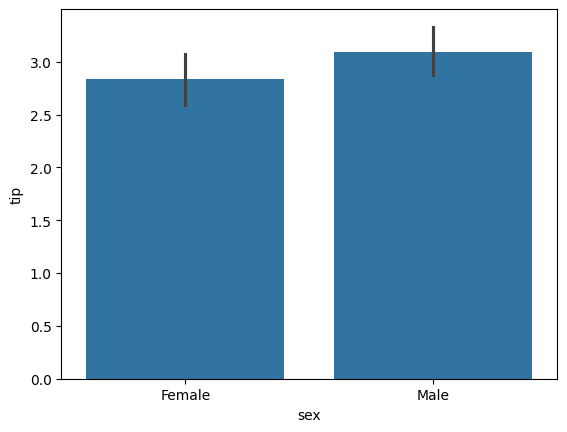

In [68]:
sns.barplot(x=df["sex"], y=df["tip"])

<Axes: xlabel='smoker', ylabel='tip'>

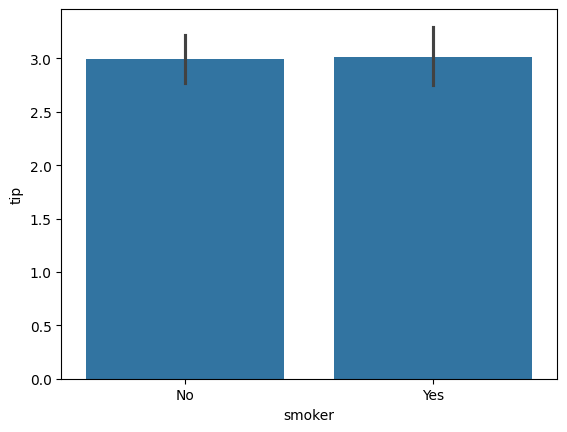

In [33]:
sns.barplot(x=df["smoker"], y=df["tip"])

<Axes: xlabel='day', ylabel='tip'>

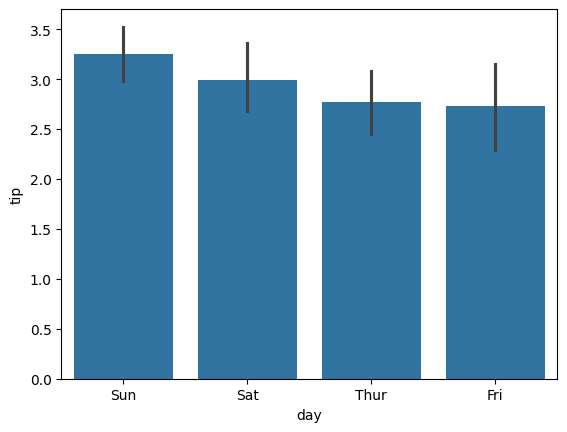

In [34]:
sns.barplot(x=df["day"], y=df["tip"])

<Axes: xlabel='time', ylabel='tip'>

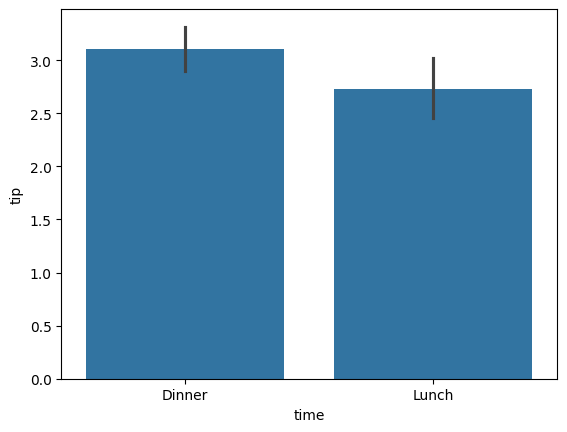

In [35]:
sns.barplot(x=df["time"], y=df["tip"])

<Axes: xlabel='size', ylabel='tip'>

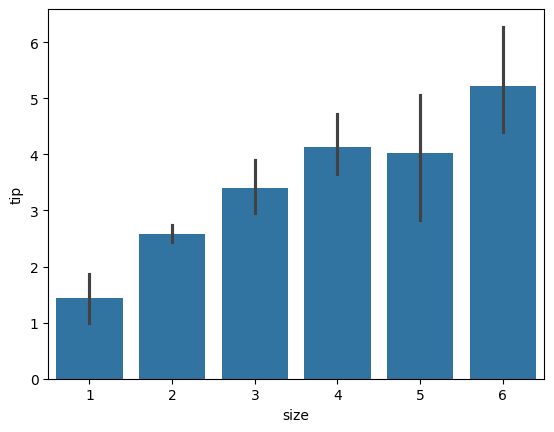

In [36]:
sns.barplot(x=df["size"], y=df["tip"])

1. Tip increaseas as total bill amount increases.
2. Men generally tip more than what women do.
3. A smoker and a non-smoker tip the same amount on an average.
4. More tip is received on Sunday compared to other days.
5. More tip is received during dinner time compared to lunch time.

<Axes: xlabel='total_bill', ylabel='tip'>

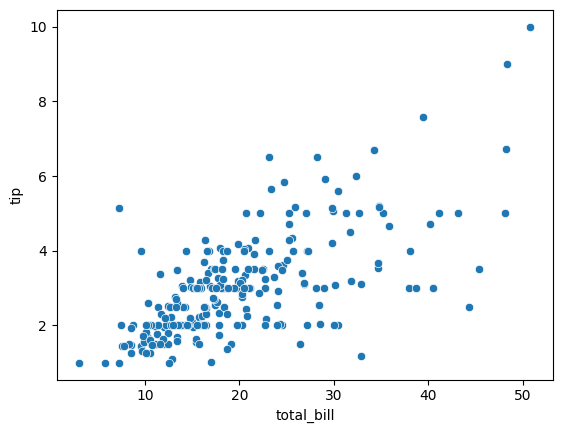

In [66]:
sns.scatterplot(x=df["total_bill"], y=df["tip"])

<Axes: xlabel='sex', ylabel='tip'>

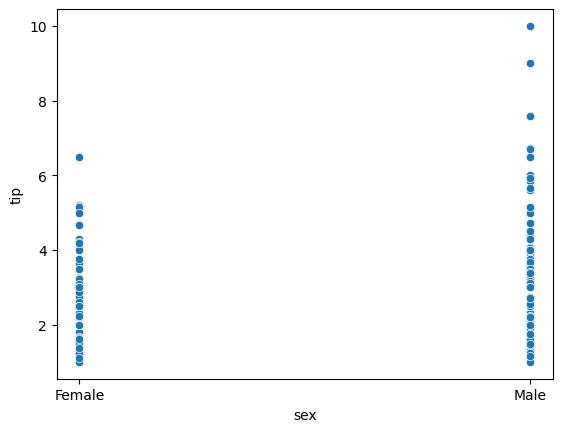

In [69]:
sns.scatterplot(x=df["sex"], y=df["tip"])

<Axes: xlabel='smoker', ylabel='tip'>

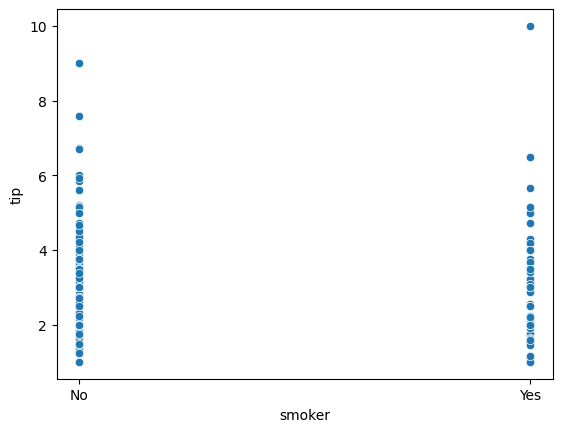

In [70]:
sns.scatterplot(x=df["smoker"], y=df["tip"])

<Axes: xlabel='day', ylabel='tip'>

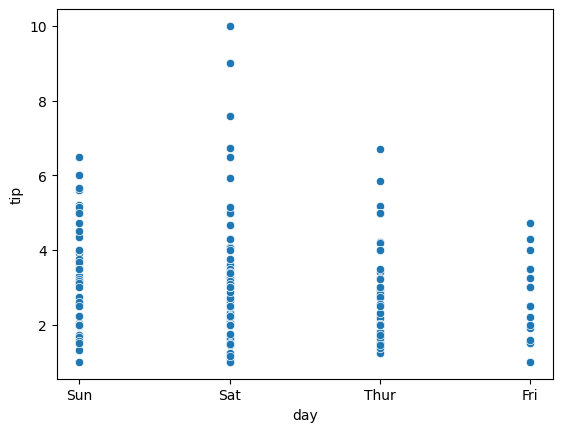

In [72]:
sns.scatterplot(x=df["day"], y=df["tip"])

<Axes: xlabel='time', ylabel='tip'>

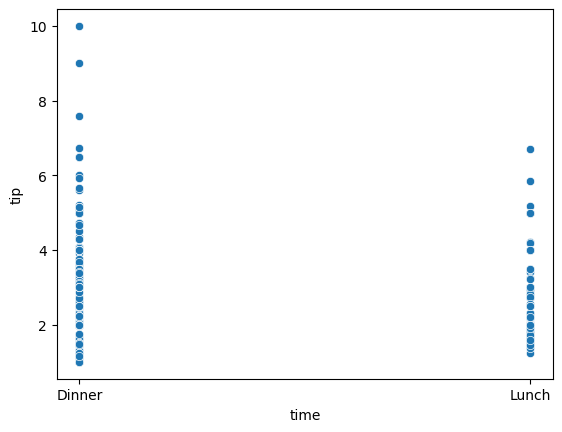

In [73]:
sns.scatterplot(x=df["time"], y=df["tip"])

<Axes: xlabel='size', ylabel='tip'>

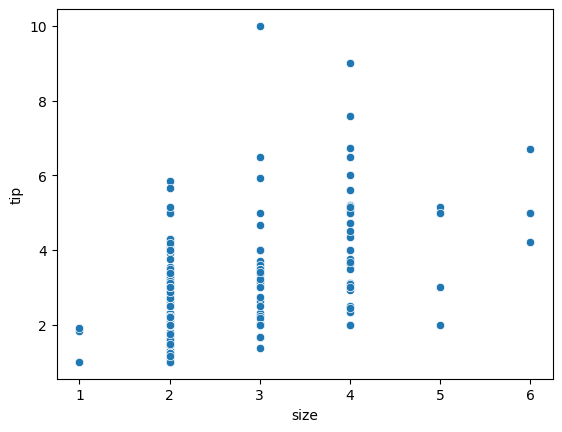

In [74]:
sns.scatterplot(x=df["size"], y=df["tip"])

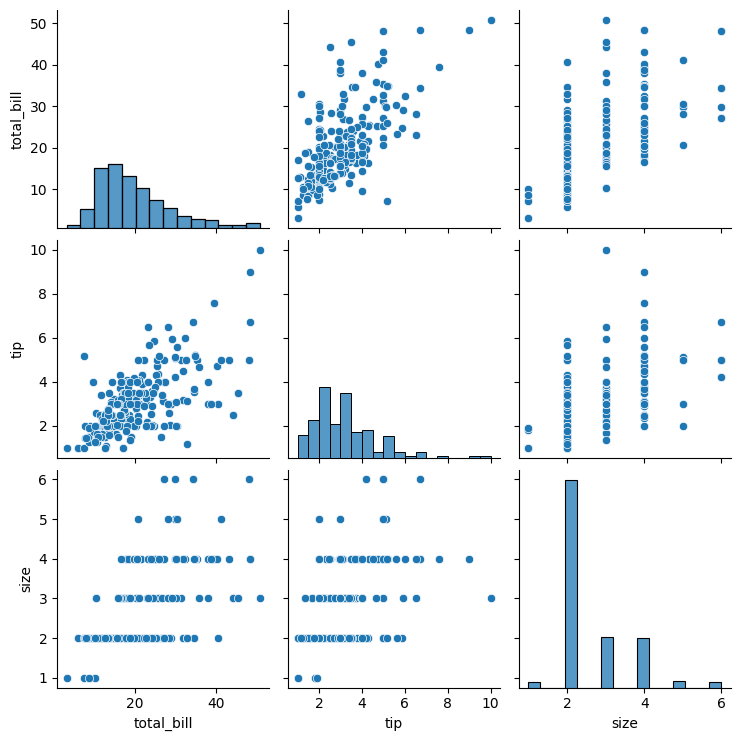

In [37]:
sns.pairplot(data)

<Axes: >

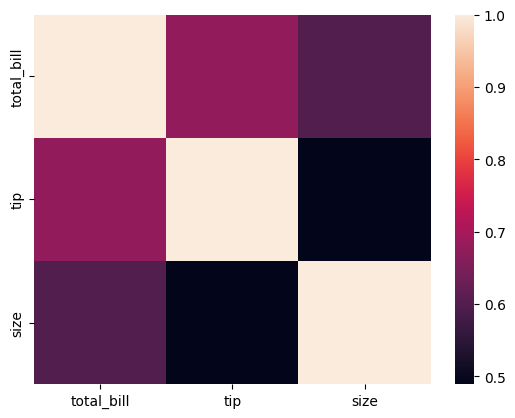

In [39]:
data_corr = df[['total_bill', 'tip', 'size']].copy()
corr = data_corr.corr()
sns.heatmap(corr)

In [59]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = data.drop(columns=["tip"])
X = sm.add_constant(X)
y = df["tip"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [60]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")


Rainbow Test Statistic: 1.2036274510126592
P-value: 0.15798464222013225


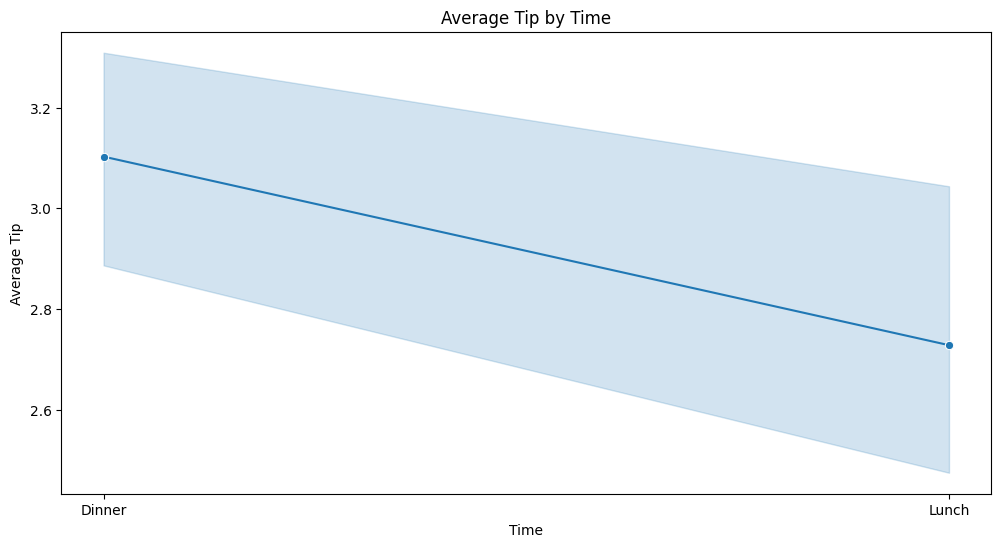

In [77]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="time", y="tip", marker="o")
plt.title("Average Tip by Time")
plt.xlabel("Time")
plt.ylabel("Average Tip")
plt.show()

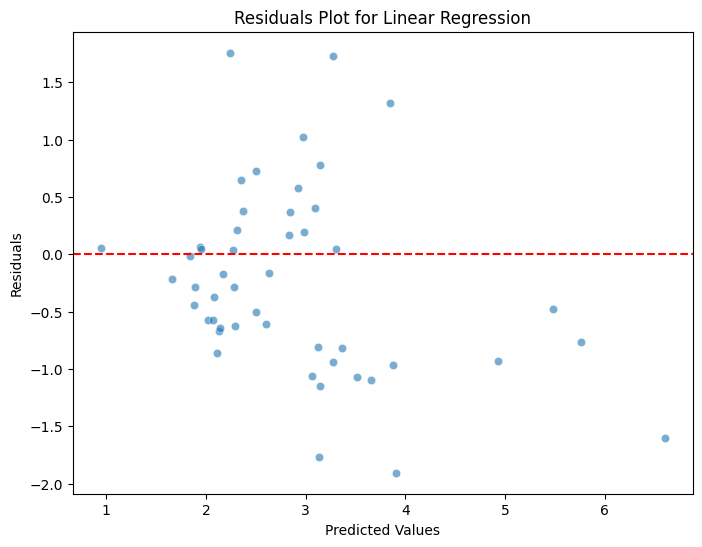

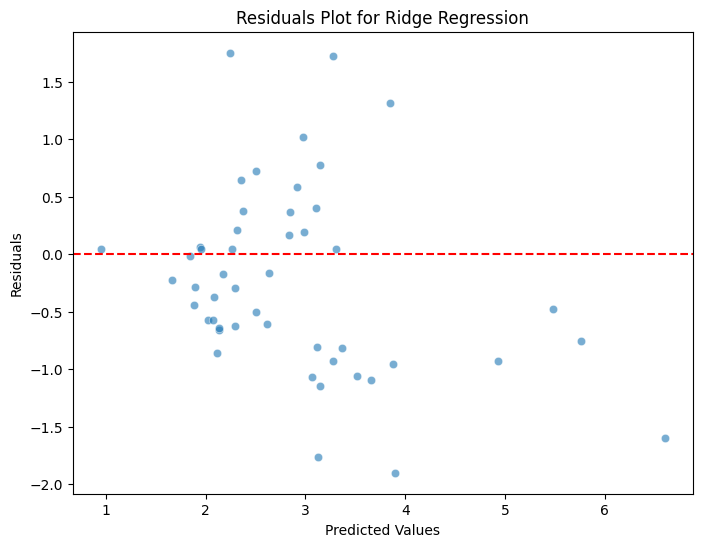

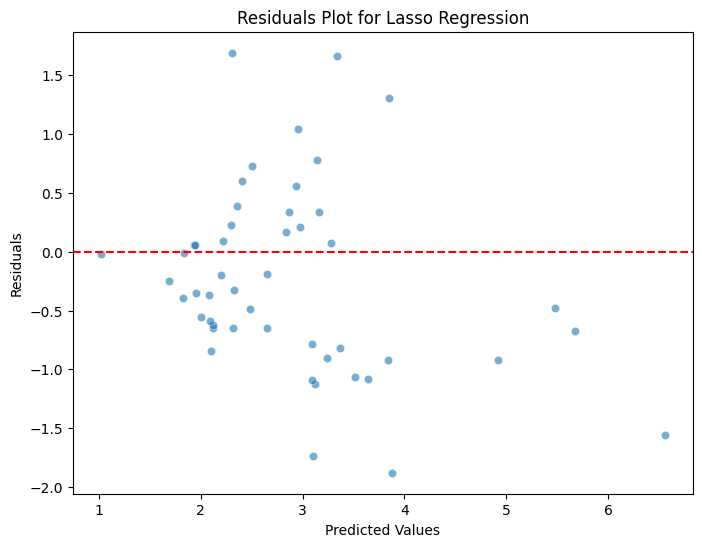

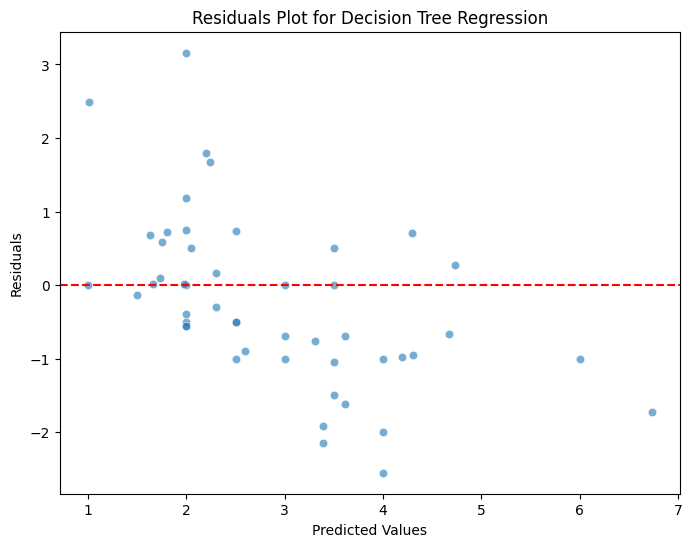

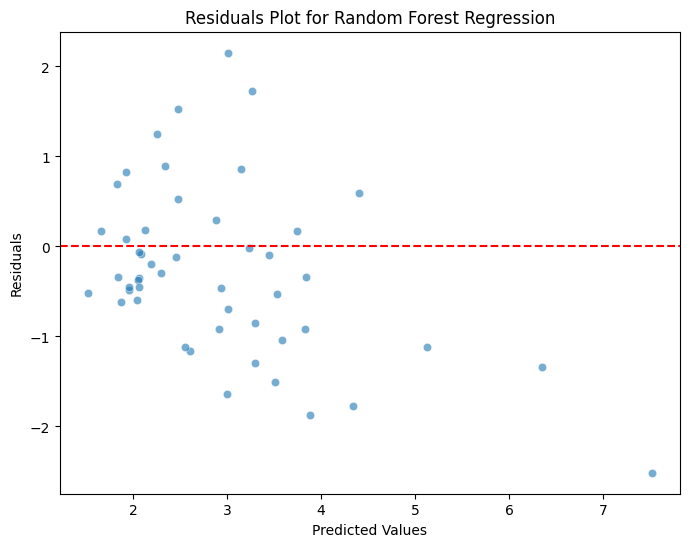

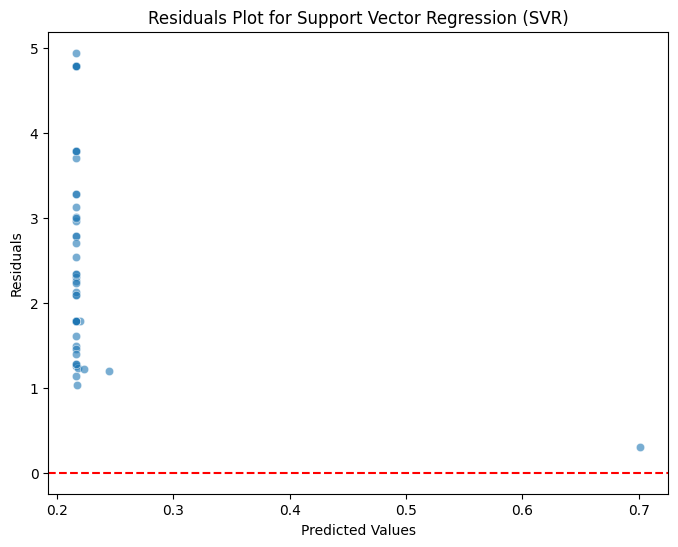

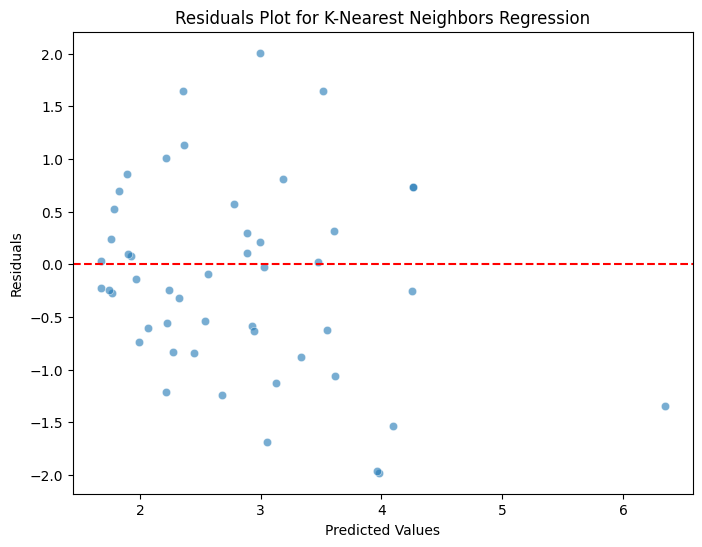

In [79]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr = linear_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree_reg.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest_reg.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr_reg.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")